In [6]:
import Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/Documents/Fun/BudgetSolver`
Precompiling project...
  ✓ LibSSH2_jll
  ✓ SuiteSparse_jll
  2 dependencies successfully precompiled in 1 seconds. 41 already precompiled.


In [7]:
using CairoMakie # requires to be installed separately

In [8]:
using BudgetSolver, Dates

In [12]:
# Parameters
nmonths = 12*60; # 60 years
starting_budget = 52000;

In [13]:
# lifestyle_interest = 0.01/12
# overall_interest = 0.02/12
# income = [starting_budget for i in 1:nmonths]
# fixed_costs = income ./ 3
# ideal_costs = [90.0 * (1 + lifestyle_interest) ^ i for i in 1:nmonths]
# scenario = BudgetSolver.FixedICC(starting_budget, income, fixed_costs)
# # println(scenario)
# solution = BudgetSolver.ipopt_solve(scenario, ideal_costs, inflation_rate = overall_interest)

In [14]:
function yearly_raise_income(base_income, nmonths, income_interest)
    income = [float(base_income)]
    while length(income) < nmonths
        month = length(income) + 1
        push!(income,
        (month % 12 == 0 ? (income_interest+1) : 1) * last(income)
    )
    end
    return income
end

yearly_raise_income (generic function with 1 method)

In [15]:
xdates = @. today() + Month(1:nmonths);

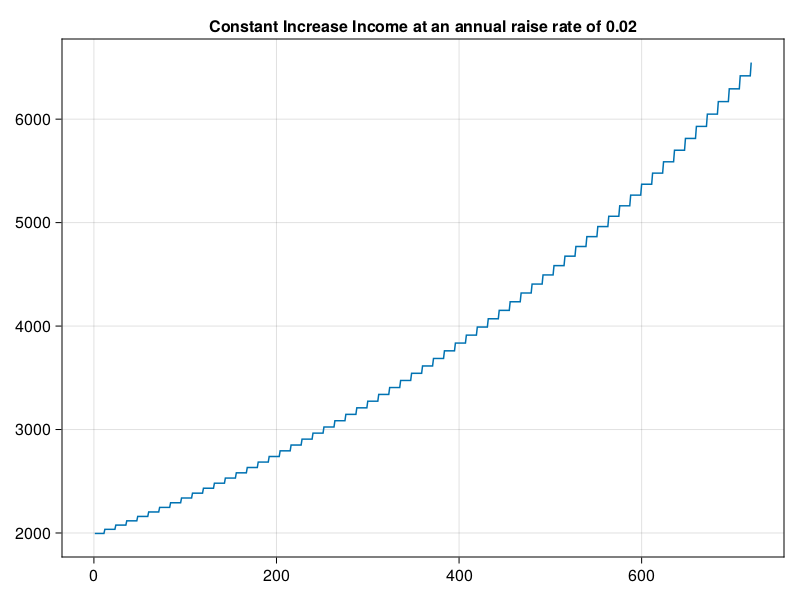

In [16]:
let raise_rate = 0.02, income = yearly_raise_income(.03837424443511097543*starting_budget, nmonths, raise_rate)
    lines(1:nmonths, income, axis = (title = "Constant Increase Income at an annual raise rate of $raise_rate", ))
end

In [17]:
function expense1(incomes)
    child1 = 12:12+12*20
    child2 = child1 .+ 12
    
    map(incomes, 1:length(incomes)) do income, month
        income * 0.3 + 
        income * 0.15 * (2 + (month in child1) + (month in child2)) + 
        income * 0.50 * (month % 3 == 0)
    end
end

expense1 (generic function with 1 method)

In [24]:
BudgetSolver.BudgetSolverResult |> fieldnames

(:costs, :wealth)

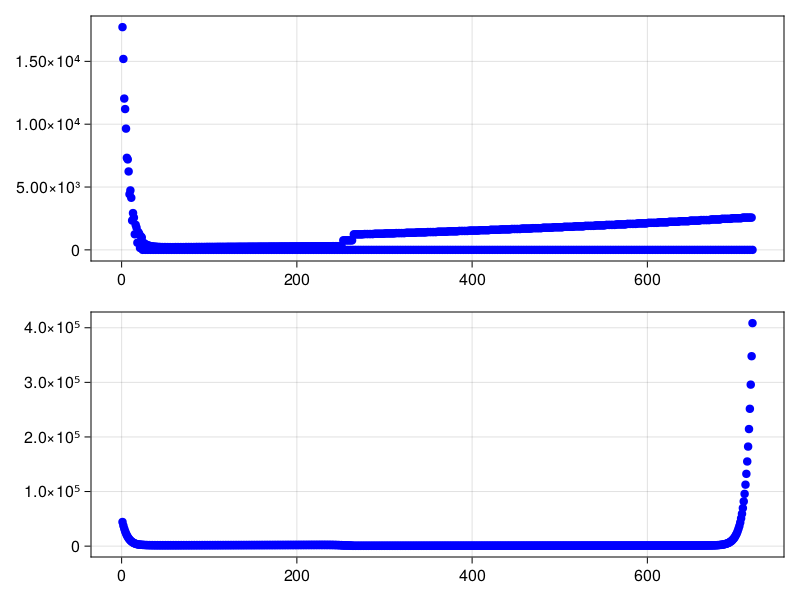

In [33]:
let raise_rate = 0.02
    incomes = yearly_raise_income(.03837424443511097543*starting_budget, nmonths, raise_rate)
    expenses = expense1(incomes)
    ideal_costs = copy(incomes)
    
    scenario = BudgetSolver.FixedICC(float(starting_budget), incomes, expenses)
    solution = BudgetSolver.ipopt_solve(scenario, ideal_costs, inflation_rate = 0.02, interest_rate = 0.2)
    total_costs = solution.costs
    
    discretionary_expenses = total_costs .- expenses
    
    fig = Figure()
    plot(fig[1, 1], 1:nmonths, discretionary_expenses, color=:blue)
    plot(fig[2, 1], 1:nmonths, solution.wealth, color=:blue)
    fig
end